# **Financial Applicactions with ML & AI**

<img style="float: right;" src="../../docs/img/logo_bourbaki.png" width="100"/>

## **Module I:** Time Series and Forecast
#### Topic: ARIMA


##### Name: Julio César Avila Torreblanca

- **Objective**: simulate and analyse Auto Regressive Integrated Moving Average by each individual part.

- **Contents**:
    1. Libraries and parameters
    2. $AR(p)$ Model
    3. $MA(q)$ Model
    4. $ARIMA(p,q)$ Model

---

# Time Series Analysis and ARIMA Model

## Introduction to Time Series

A **time series** is a sequence of data points recorded at successive points in time. It is used to analyze past behavior and predict future values based on identified patterns.

### Decomposition of Time Series

A time series can be decomposed into three components:

1. **Trend:** The long-term progression of the series. It represents the underlying direction over a prolonged period.
2. **Seasonality:** Patterns that repeat at regular intervals due to seasonal factors.
3. **Residuals or White Noise:** The random variation that doesn't seem to follow a pattern, often assumed to be noise without any discernible structure.

## Stationary Time Series

A **stationary time series** is crucial for modeling, as it has statistical properties like mean and variance that do not change over time. Stationarity is important because many time series models perform best under this assumption.

### Augmented Dickey-Fuller (ADF) Test

The **ADF Test** is a statistical test used to determine if a time series is stationary. It tests the null hypothesis that a unit root is present in the series, which indicates non-stationarity.

## Autocorrelation and Partial Autocorrelation

### Autocorrelation Function (ACF)

The ACF measures the correlation between observations of a time series separated by various time lags. It helps identify the presence of repetitive patterns over specified periods.

### Partial Autocorrelation Function (PACF)

The PACF measures the correlation between observations of a time series while controlling for values at intermediate lags. It is useful for identifying the most significant lags in an autoregressive model.

## Ljung-Box Test

The **Ljung-Box Test** checks if there are significant autocorrelations at various lags. It tests the null hypothesis that there are no correlations up to a certain lag.

## Time Series Models

### Moving Average (MA) Model

- **Description:** In an MA model, the output variable depends linearly on the current and past error terms (random shocks). It is denoted as MA(q), where q is the order.
- **Mathematical Function:**

$$
y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}
$$

where $ \mu $ is the mean of the series, $\varepsilon_t$ is a white noise error term, and $\theta_1, \theta_2, \ldots, \theta_q$ are the parameters.

- **Assumptions:** Data is stationary, with constant mean and variance.

### Autoregressive (AR) Model

- **Description:** An AR model assumes that the current value of the series is based on its previous values. It is denoted as AR(p), where p is the order representing the number of lags.
- **Mathematical Function:**

$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t
$$

where $ c $ is a constant, $\phi_1, \phi_2, \ldots, \phi_p$ are the parameters, and $\varepsilon_t$ is a white noise error term.

- **Assumptions:** Data is stationary, requiring constant mean and variance.

## ARIMA Model

The **ARIMA (AutoRegressive Integrated Moving Average)** model combines AR, Integration, and MA components to handle non-stationary data.

### Integrated (I) Component

- **Purpose:** The integrated part of ARIMA involves differencing the data to make the series stationary. This is especially useful for removing trend components.

$$
\nabla^d y_t = (1 - B)^d y_t
$$

$$y'_t = AR(p)+MA(q)$$

where $B$ is the backshift operator, $\nabla$ represents differencing, and $d$ is the number of differences needed for stationarity.

- **Assumptions:** After differencing, the data should ideally be stationary.

### ARIMA Model Mathematical Function

An $ARIMA(p, d, q)$ model can be expressed as:

$$
\phi(B)(1 - B)^d y_t = \theta(B) \varepsilon_t
$$

where $\phi(B)$ and $\theta(B)$ are polynomials of order $p$ and $q$ respectively, describing the AR and MA parts of the model. $\varepsilon_t$ represents white noise.

## Comparison

- **MA vs AR:** MA models work well for capturing short-term dependencies, while AR models are better for capturing long-term temporal dependencies.
- **ARIMA:** Combines both approaches and uses differencing to handle non-stationarity, providing flexibility in modeling various time series data patterns.

## Summary

- **Time Series Decomposition:** Helps isolate distinct components within the data.
- **Testing for Stationarity:** ADF and Ljung-Box tests check if the time series is stationary.
- **Models Applications:** AR, MA, and ARIMA models serve different purposes and assumptions about the data; ARIMA effectively combines these elements, using differencing to work with non-stationary data.
- **Combined Use:** For comprehensive time series forecasting, these models are often used together to capture patterns, trends, seasonality, and noise.

----

# 1. Librerías y parámetros

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt
# test
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 2. Auto Regressive Process: $AR(p)$

## 2.1 Data Generation

In [ ]:
data = yf.download(
        tickers = "MXN=X", # dollar price
        period = "1y", # one year information
        interval = "1d", # daily information
    ).loc[:, 'Close']

data = data.rename(columns={'MXN=X': 'dollar_price'})
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,dollar_price
Date,
2024-04-15,16.611080
2024-04-16,16.694401
2024-04-17,17.033340
2024-04-18,16.956301
2024-04-19,17.074961
...,...
2025-04-08,20.696550
2025-04-09,20.836241
2025-04-10,20.333549


## 2.2 EDA

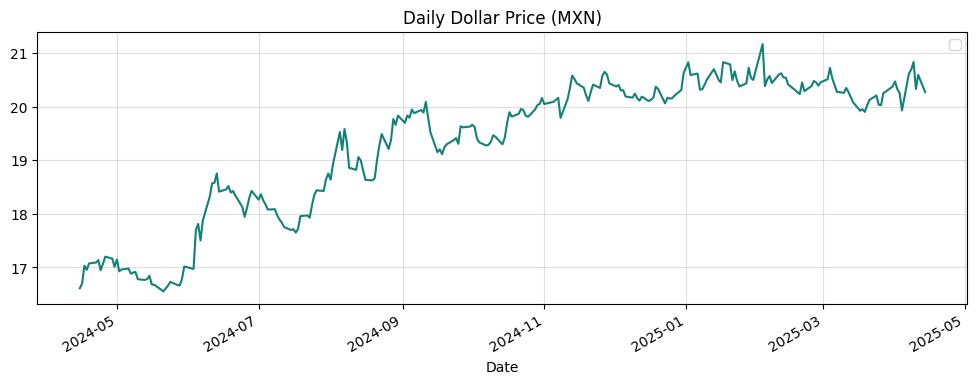

In [ ]:
data['dollar_price'].plot(
    figsize = (12,4),
    color='#128277'
)

plt.title("Daily Dollar Price (MXN)")
plt.grid(alpha=0.4)
plt.legend('')
plt.show()

### Test - TS Stationary

In [ ]:
# ADF test
ADF_result = adfuller(data['dollar_price'])

print('ADF test original data:')
print(f'-> ADF Statistic: {ADF_result[0]}')
print(f'-> p-value: {ADF_result[1]}')

ADF test original data:
-> ADF Statistic: -2.001594622268524
-> p-value: 0.28587435088066476


In [ ]:
# log returns  are stationary
data['log_returns'] = data['dollar_price'].pct_change()
data = data.dropna()

ADF_result = adfuller(data['log_returns'])

print('ADF test con los retornos logarítmicos:')
print(f'-> ADF Statistic: {ADF_result[0]}')
print(f'-> p-value: {ADF_result[1]}')

ADF test con los retornos logarítmicos:
-> ADF Statistic: -5.698197929828799
-> p-value: 7.785318825384673e-07


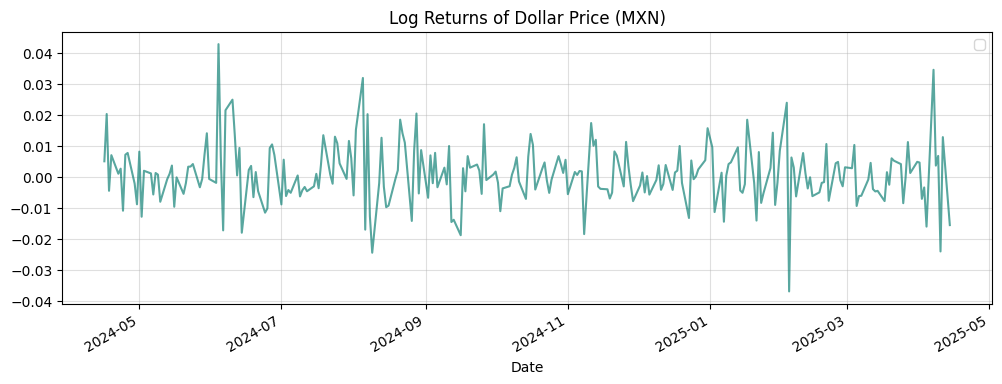

In [ ]:
data['log_returns'].plot(
    figsize = (12,4),
    color='#128277',
    alpha=0.7
)

plt.title("Log Returns of Dollar Price (MXN)")
plt.grid(alpha=0.4)
plt.legend('')
plt.show()

### Getting $p$ order

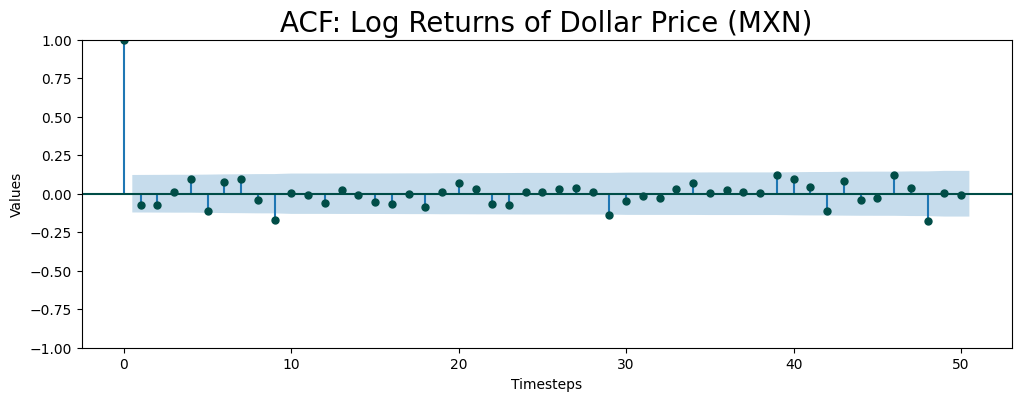

In [ ]:
# ACF plot
n_coef = 50
fig, ax = plt.subplots(figsize=(12,4))

plot_acf(
    x=data['log_returns'],
    ax=ax,
    lags=n_coef,
    color='#004D47',
    #alpha=0.7
)
ax.set(
    xlabel='Timesteps',
    ylabel='Values',
    title = 'ACF: Log Returns of Dollar Price (MXN)')
ax.title.set_size(20)
plt.show()

## 2.3 Modeling

### Split Data

In [ ]:
train_data = data.iloc[:-20,:].copy()
test_data = data.iloc[-20:,:].copy()

print(train_data.shape)
print(test_data.shape)

(239, 2)
(20, 2)


### Train Model

In [ ]:
# MODELO ARIMA
model_ar = ARIMA(
    train_data['log_returns'],
    order=(1, 0, 0),
    enforce_stationarity=False,
)

model_ar_fitted = model_ar.fit()

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_ar_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                  239
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 777.364
Date:                Sun, 13 Apr 2025   AIC                          -1548.728
Time:                        19:33:09   BIC                          -1538.311
Sample:                             0   HQIC                         -1544.529
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.279      0.201      -0.000       0.002
ar.L1         -0.0335      0.051     -0.656      0.512      -0.134       0.067
sigma2      8.514e-05   5.26e-06     16.183      0.0

## 2.4 Forecasting

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


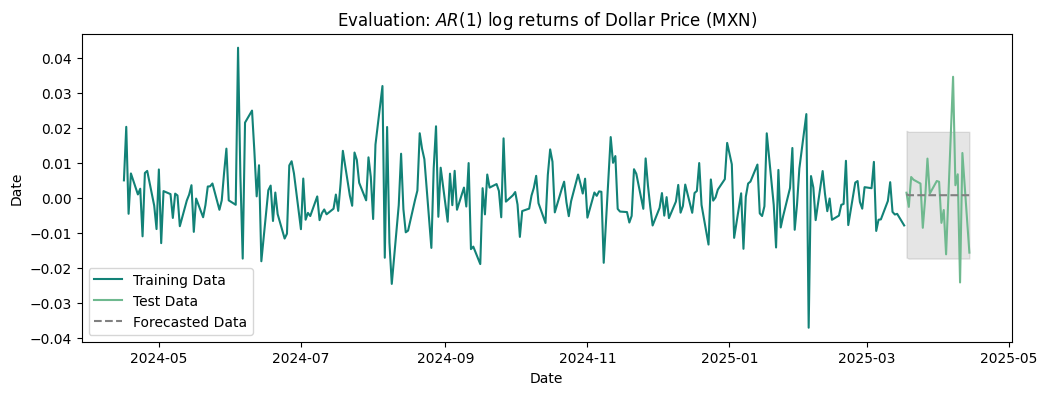

RMSE: 0.0120
MAE: 0.0085


In [ ]:
# log returns
test_forecast = model_ar_fitted.get_forecast(steps=len(test_data))
test_forecast_series = pd.Series(test_forecast.predicted_mean.values, index=test_data.index)

# metrics
mse = mean_squared_error(test_data['log_returns'], test_forecast_series)
rmse = mse**0.5
mae = mean_absolute_error(test_data['log_returns'], test_forecast_series)

# plot for comparing
plt.figure(figsize=(12,4))
plt.plot(train_data['log_returns'], label='Training Data', color='#128277')
plt.plot(test_data['log_returns'], label='Test Data', color='#6FB98F',)
plt.plot(test_forecast_series, label='Forecasted Data', color='grey', linestyle='--')
plt.fill_between(test_data.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.1)
plt.title('Evaluation: $AR(1)$ log returns of Dollar Price (MXN)')
plt.xlabel('Date')
plt.ylabel('Date')
plt.legend()
plt.show()

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


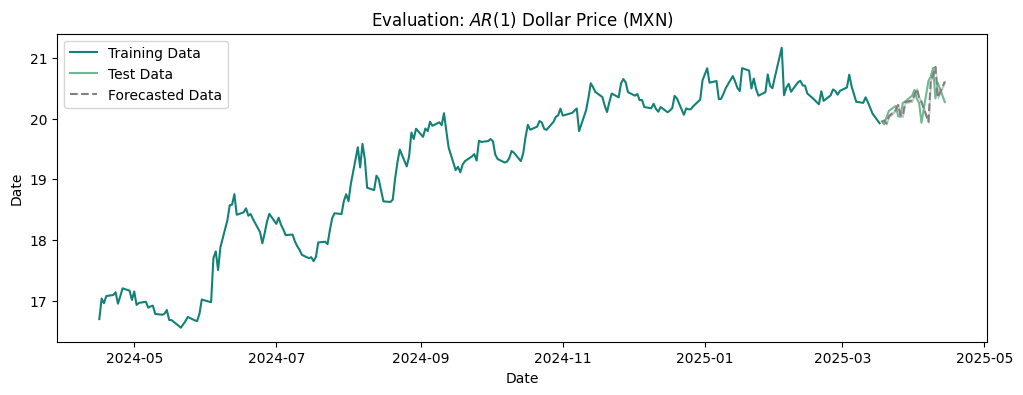

RMSE: 0.2436
MAE: 0.1735


In [ ]:
# log returns
test_forecast = model_ar_fitted.get_forecast(steps=len(test_data))
test_forecast_values = test_forecast.predicted_mean.values

# inverse log return
for index,val in enumerate(test_forecast_values):
  test_forecast_values[index] = np.exp(val)*data['dollar_price'].iloc[-21+index]

test_forecast_series = pd.Series(test_forecast_values, index=test_data.index)
# metrics
mse = mean_squared_error(test_data['dollar_price'], test_forecast_series)
rmse = mse**0.5
mae = mean_absolute_error(test_data['dollar_price'], test_forecast_series)

# plot for comparing
plt.figure(figsize=(12,4))
plt.plot(train_data['dollar_price'], label='Training Data', color='#128277')
plt.plot(test_data['dollar_price'], label='Test Data', color='#6FB98F',)
plt.plot(test_forecast_series, label='Forecasted Data', color='grey', linestyle='--')
plt.fill_between(test_data.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluation: $AR(1)$ Dollar Price (MXN)')
plt.xlabel('Date')
plt.ylabel('Date')
plt.legend()
plt.show()

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

# 3. Moving Average Process: $MA(q)$

## 3.1 EDA

### Getting $q$ order

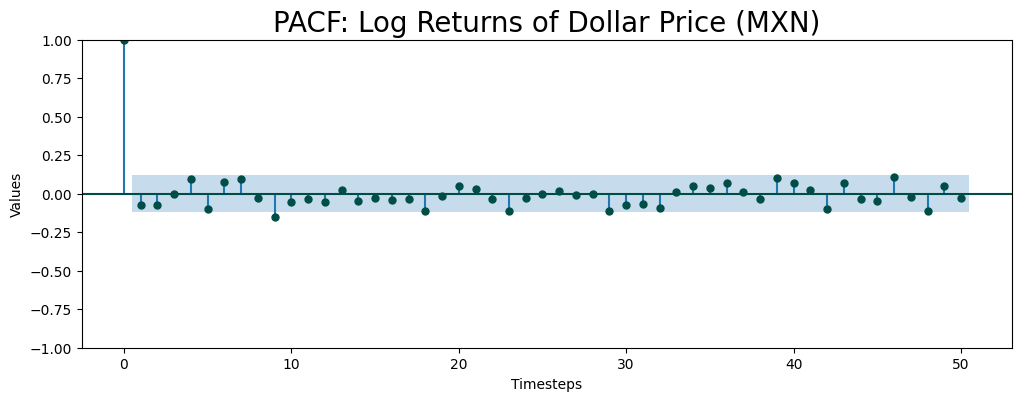

In [ ]:
# ACF plot
n_coef = 50
fig, ax = plt.subplots(figsize=(12,4))

plot_pacf(
    x=data['log_returns'],
    ax=ax,
    lags=n_coef,
    color='#004D47',
    #alpha=0.7
)
ax.set(
    xlabel='Timesteps',
    ylabel='Values',
    title = 'PACF: Log Returns of Dollar Price (MXN)')
ax.title.set_size(20)
plt.show()

## 3.2 Modeling

### Train Model

In [ ]:
# MODELO ARIMA
model_ma = ARIMA(
    train_data['log_returns'],
    order=(0, 0, 1),
    enforce_stationarity=False,
)

model_ma_fitted = model_ma.fit()

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_ma_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                  239
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 775.884
Date:                Sun, 13 Apr 2025   AIC                          -1545.768
Time:                        19:37:03   BIC                          -1535.363
Sample:                             0   HQIC                         -1541.574
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      1.164      0.244      -0.000       0.002
ma.L1         -0.0422      0.051     -0.826      0.409      -0.142       0.058
sigma2      8.387e-05   5.15e-06     16.290      0.0

## 3.3 Forecasting

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


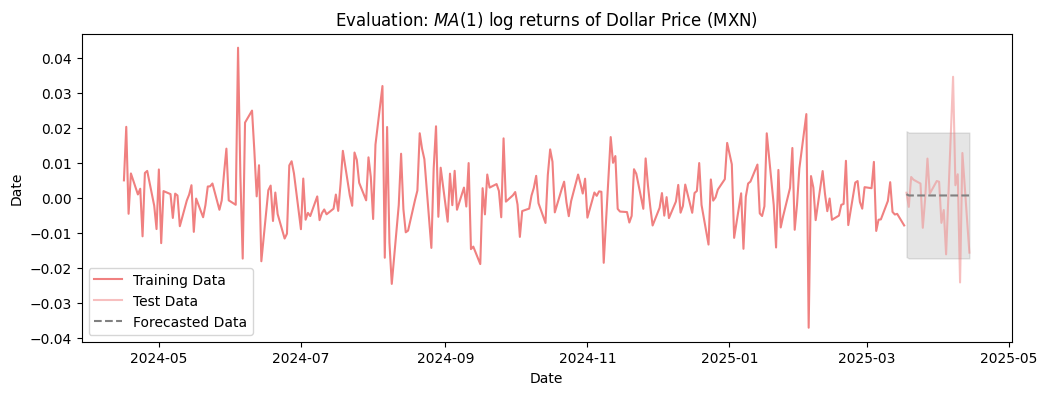

RMSE: 0.0120
MAE: 0.0086


In [ ]:
# log returns
test_forecast = model_ma_fitted.get_forecast(steps=len(test_data))
test_forecast_series = pd.Series(test_forecast.predicted_mean.values, index=test_data.index)

# metrics
mse = mean_squared_error(test_data['log_returns'], test_forecast_series)
rmse = mse**0.5
mae = mean_absolute_error(test_data['log_returns'], test_forecast_series)

# plot for comparing
plt.figure(figsize=(12,4))
plt.plot(train_data['log_returns'], label='Training Data', color='lightcoral')
plt.plot(test_data['log_returns'], label='Test Data', color='lightcoral', alpha=0.5)
plt.plot(test_forecast_series, label='Forecasted Data', color='grey', linestyle='--')
plt.fill_between(test_data.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.1)
plt.title('Evaluation: $MA(1)$ log returns of Dollar Price (MXN)')
plt.xlabel('Date')
plt.ylabel('Date')
plt.legend()
plt.show()

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


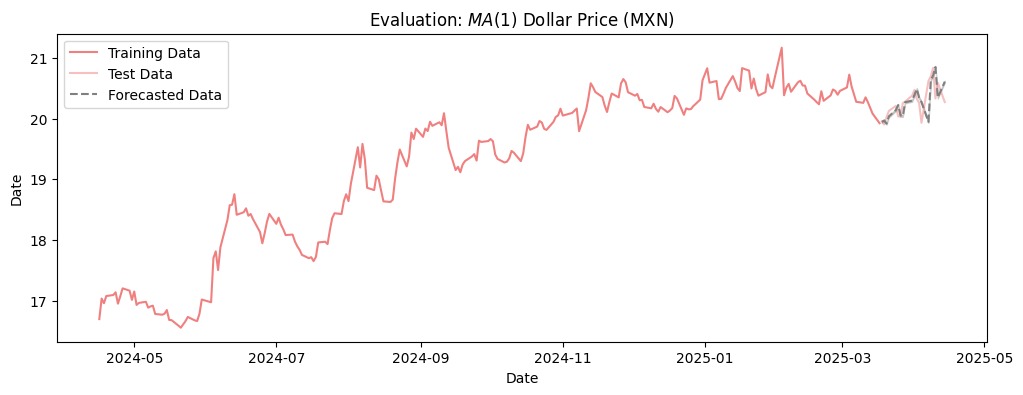

RMSE: 0.2436
MAE: 0.1737


In [ ]:
# log returns
test_forecast = model_ar_fitted.get_forecast(steps=len(test_data))
test_forecast_values = test_forecast.predicted_mean.values

# inverse log return
for index,val in enumerate(test_forecast_values):
  test_forecast_values[index] = np.exp(val)*data['dollar_price'].iloc[-21+index]

test_forecast_series = pd.Series(test_forecast_values, index=test_data.index)
# metrics
mse = mean_squared_error(test_data['dollar_price'], test_forecast_series)
rmse = mse**0.5
mae = mean_absolute_error(test_data['dollar_price'], test_forecast_series)

# plot for comparing
plt.figure(figsize=(12,4))
plt.plot(train_data['dollar_price'], label='Training Data', color='lightcoral')
plt.plot(test_data['dollar_price'], label='Test Data', color='lightcoral', alpha=0.5)
plt.plot(test_forecast_series, label='Forecasted Data', color='grey', linestyle='--')
plt.fill_between(test_data.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluation: $MA(1)$ Dollar Price (MXN)')
plt.xlabel('Date')
plt.ylabel('Date')
plt.legend()
plt.show()

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

# 4. Auto Regressive Integrated Moving Average Process: $ARIMA(p,d,q)$

## 4.1 Modeling

### Train Model

In [ ]:
# MODELO ARIMA
model_arima = ARIMA(
    train_data['dollar_price'],
    order=(1, 1, 1),
    enforce_stationarity=False,
)

model_arima_fitted = model_arima.fit()

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_arima_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:           dollar_price   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  74.752
Date:                Sun, 13 Apr 2025   AIC                           -143.505
Time:                        19:40:56   BIC                           -133.113
Sample:                             0   HQIC                          -139.316
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3793      0.680      0.558      0.577      -0.953       1.712
ma.L1         -0.4389      0.662     -0.663      0.507      -1.736       0.858
sigma2         0.0311      0.002     16.044      0.0

## 4.2 Forecasting

/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/javilatorreb/Documents/Programming/course_financial_applications/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


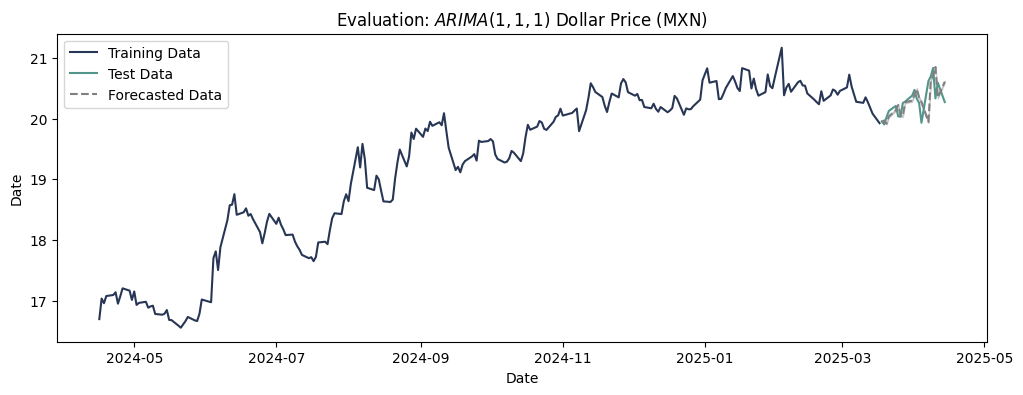

RMSE: 0.2436
MAE: 0.1737


In [ ]:
# log returns
test_forecast = model_ar_fitted.get_forecast(steps=len(test_data))
test_forecast_values = test_forecast.predicted_mean.values

# inverse log return
for index,val in enumerate(test_forecast_values):
  test_forecast_values[index] = np.exp(val)*data['dollar_price'].iloc[-21+index]

test_forecast_series = pd.Series(test_forecast_values, index=test_data.index)
# metrics
mse = mean_squared_error(test_data['dollar_price'], test_forecast_series)
rmse = mse**0.5
mae = mean_absolute_error(test_data['dollar_price'], test_forecast_series)

# plot for comparing
plt.figure(figsize=(12,4))
plt.plot(train_data['dollar_price'], label='Training Data', color='#283655')
plt.plot(test_data['dollar_price'], label='Test Data', color='#52958B')
plt.plot(test_forecast_series, label='Forecasted Data', color='grey', linestyle='--')
plt.fill_between(test_data.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluation: $ARIMA(1,1,1)$ Dollar Price (MXN)')
plt.xlabel('Date')
plt.ylabel('Date')
plt.legend()
plt.show()

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')